In [2]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *
from methods.utils.utilities import *

dataTank = pd.read_csv('data/dataBenchmark.csv')
u = np.reshape(np.array(dataTank['uEst']), (1,-1))
y = np.reshape(np.array(dataTank['yEst']), (1,-1))

begin = 0
uVal = np.reshape(np.array(dataTank['uVal'][begin:]), (1,-1))
yVal = np.reshape(np.array(dataTank['yVal'][begin:]), (1,-1))

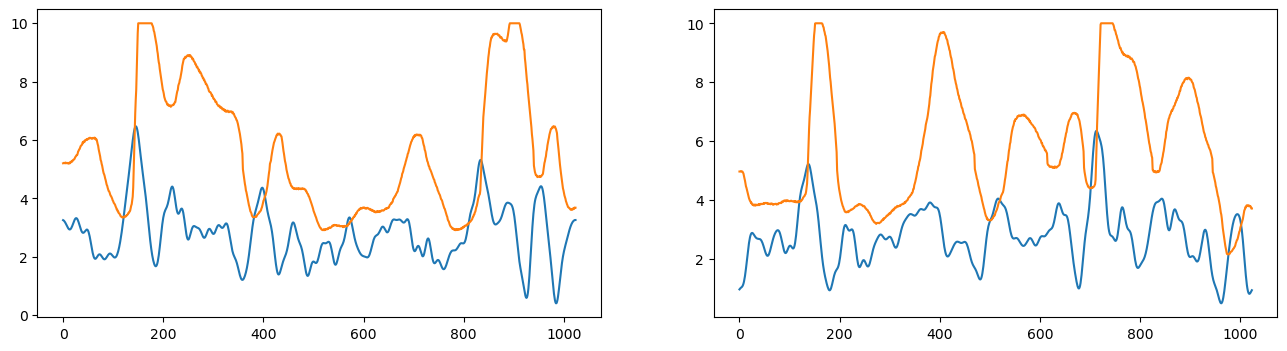

In [10]:
f, ax = plt.subplots(1, 2, figsize=[16,4])
ax[0].plot(u.T)
ax[0].plot(y.T)
plt.plot(uVal.T)
plt.plot(yVal.T)
plt.show()

In [18]:
#Selecione o tanque 
output = 0  # 0 ou 1

num = [6, 5]
params = []
Ts = 4
params.append({'nb':[4],'na':[4], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':True, 'delay':1, 'diff':False})

#params.append({'nb':[2],'na':[4], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':True, 'delay':1, 'diff':False})
#params.append({'nb':[3],'na':[10], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':True, 'delay':1, 'diff':False})


sselector = structureSelector()
ss = sselector.symbolic_regressors(**params[output])

vCandidatos = sselector.matrix_candidate(u, y, **params[output], dt=Ts)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, y[output, pad:], num[output], 0.0000001)
theta = LSM(y[output, pad:], psi)
model = ss[selected]
print(model, theta)

slivre = sselector.predict(u, y, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], diff=params[output]['diff'], dt=Ts)
yhat = sselector.oneStepForward(u, y, theta, ss[selected], params[output]['nb'], params[output]['na'], output, diff=params[output]['delay'], dt=Ts)

rs = y - slivre
rh = y - yhat

print('MAPE LIVRE:', str(round((np.mean(np.abs(rs)/np.mean(y))) * 100, 4)) + '%')
print('MAPE LIVRE:', str(round((np.mean(np.abs(rh)/np.mean(y))) * 100, 4)) + '%')

[Y1.1 Y1.3 U1.4 sqrtM(U1.1) Y1.2 U1.2] [ 1.42755313 -0.32502494  0.01706342 -0.03561499 -0.10703923  0.01274549]
Simulação livre
--------s:  [Y1.1, Y1.2, Y1.3, Y1.4, U1.1, U1.2, U1.3, U1.4]
MAPE LIVRE: 7.7271%
MAPE LIVRE: 0.5034%


In [1]:
y

NameError: name 'y' is not defined

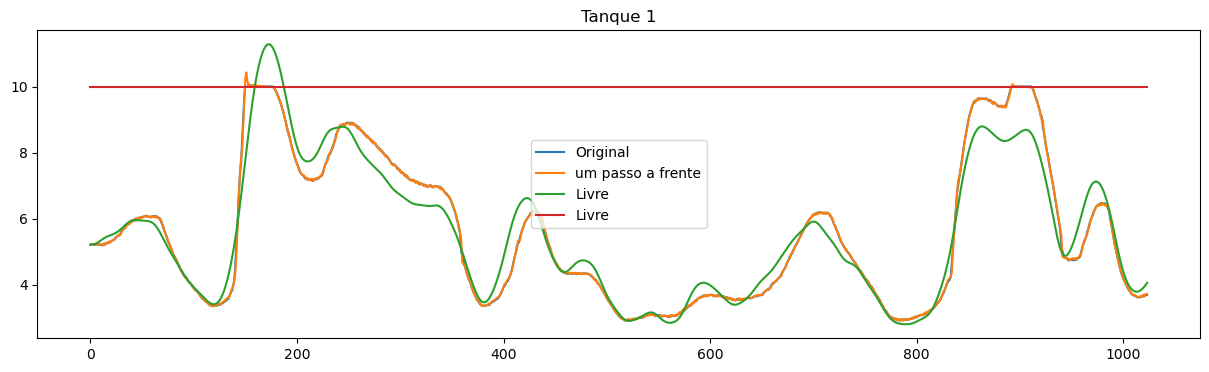

In [21]:

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.plot(np.ones(slivre.shape) * 10, label='Livre')
plt.legend()
plt.show()

## Validação

Simulação livre
--------s:  [Y1.1, Y1.2, Y1.3, Y1.4, U1.1, U1.2, U1.3, U1.4]
MAPE LIVRE: 8.9156%
MAPE LIVRE: 0.5378%


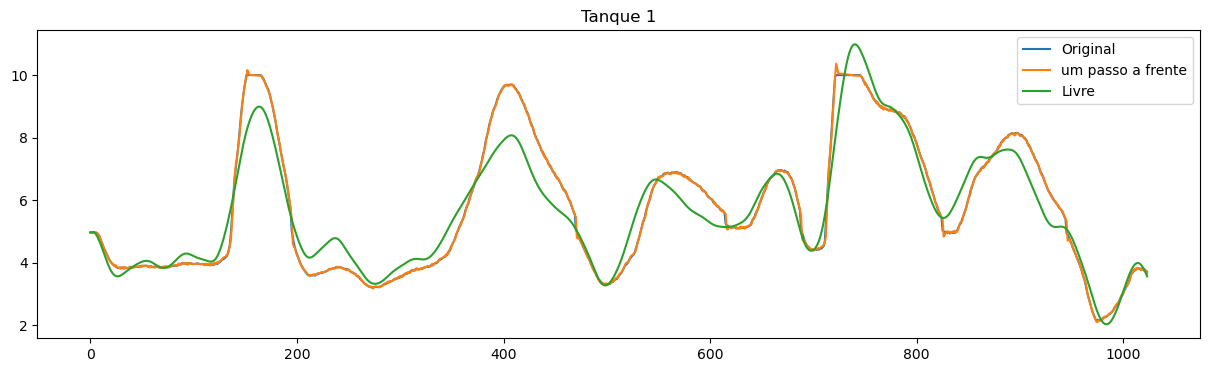

In [22]:
slivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], diff=params[output]['diff'], dt=0.1)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, diff=params[output]['delay'], dt=0.1)

rs = yVal - slivre
rh = yVal - yhat

print('MAPE LIVRE:', str(round((np.mean(np.abs(rs)/np.mean(yVal))) * 100, 4)) + '%')
print('MAPE LIVRE:', str(round((np.mean(np.abs(rh)/np.mean(yVal))) * 100, 4)) + '%')

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(yVal.T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()